<a href="https://colab.research.google.com/github/ibritics/Fraud_Detection/blob/main/Fraud_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split, KFold,\
cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

## Importing a dataset and descriptive analysis

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Master's Application/Masters/Canada/Phd/Fraud Analytics/creditcard.csv")

In [ ]:
# shape
df.shape

(284807, 31)

In [ ]:
set_option('display.width', 100)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Is dataset balanced?

In [ ]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))


Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


Notice the stark imbalance of the data labels. Most of the transactions are nonfraud.
If we use this dataset as the base for our modeling, most models will not place enough
emphasis on the fraud signals; the nonfraud data points will drown out any weight the fraud signals provide. As is, we may encounter difficulties modeling the predic‐
tion of fraud, with this imbalance leading the models to simply assume all transac‐
tions are nonfraud. This would be an unacceptable result. We will explore some ways
of dealing with this issue in the subsequent sections.

3.2. Data visualization. Since the feature descriptions are not provided, visualizing the
data will not lead to much insight. This step will be skipped in this case study.
4. Data preparation
This data is from Kaggle and is already in a cleaned format without any empty rows
or columns. Data cleaning or categorization is unnecessary.

In [ ]:
Y= df["Class"]
X = df.loc[:, df.columns != 'Class']
validation_size = 0.2
seed = 42
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

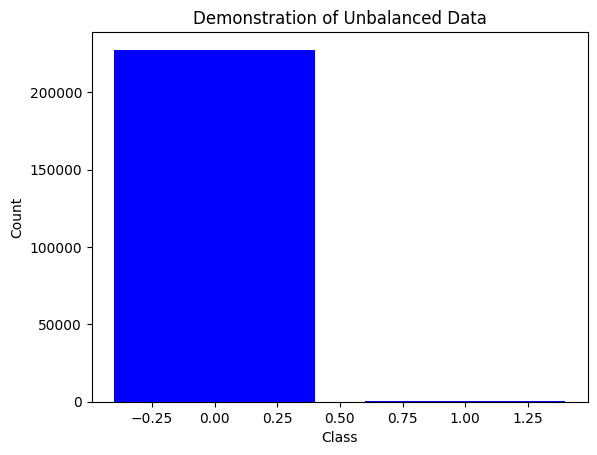

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Count the occurrences of each class in Y_train
unique_classes, counts = np.unique(Y_train, return_counts=True)

# Plot the bar plot
plt.bar(unique_classes, counts, color='blue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Demonstration of Unbalanced Data')

# Show the plot
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to
XB_train, YB_train = sm.fit_resample(X_train, Y_train)

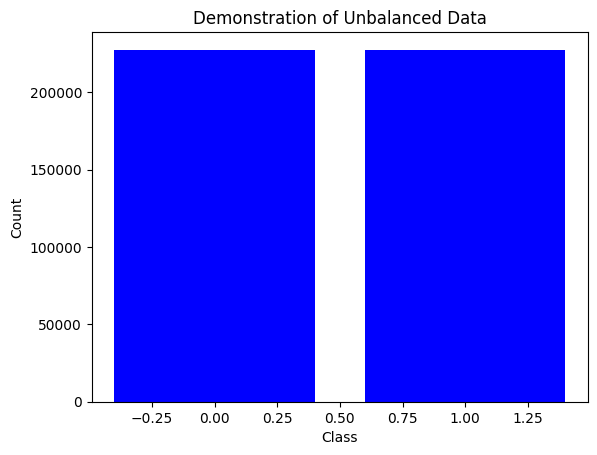

In [ ]:
import matplotlib.pyplot as plt
import numpy as np



# Count the occurrences of each class in Y_train
unique_classes, counts = np.unique(YB_train, return_counts=True)

# Plot the bar plot
plt.bar(unique_classes, counts, color='blue')

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Demonstration of Unbalanced Data')

# Show the plot
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.model_selection import cross_val_score, StratifiedKFold


## Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

param_grid = {
  'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust the hyperparameter values as needed
}
#Smaller C: Stronger regularization. The model will be simpler and more generalized, potentially sacrificing fit to the training data for better performance on new, unseen data. This can help prevent overfitting.
#Larger C: Weaker regularization. The model will try to fit the training data more closely, potentially capturing noise and specific patterns that might not generalize well to new data. This can lead to overfitting.
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(XB_train, YB_train)

# Retrieve the best model and threshold
best_logreg = grid_search.best_estimator_

# Predict on the test data with the optimized threshold
y_prob_test = best_logreg.predict_proba(X_test)[:, 1]
y_pred_test = (y_prob_test >0.7).astype(int) #keeping as conservative as possible because fraud activities are serious claim

# Evaluate the model on the test set
accuracy_test = accuracy_score(Y_test, y_pred_test)
print("Test Accuracy: {:.2f}%".format(accuracy_test * 100))

print("Test Classification Report:\n", classification_report(Y_test, y_pred_test))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Test Accuracy: 98.87%
Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.12      0.89      0.21        98

    accuracy                           0.99     56962
   macro avg       0.56      0.94      0.60     56962
weighted avg       1.00      0.99      0.99     56962



Test Accuracy: 98.87%


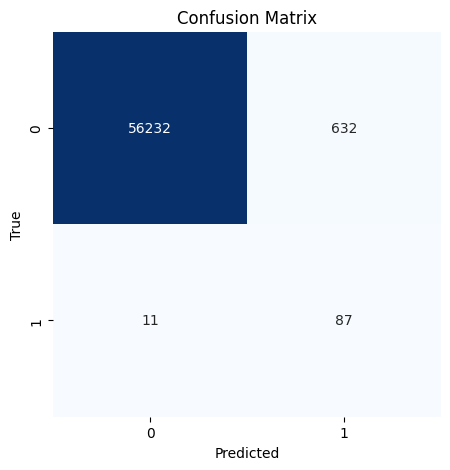

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_test = accuracy_score(Y_test, y_pred_test)
print("Test Accuracy: {:.2f}%".format(accuracy_test * 100))

# Plot the confusion matrix
cm = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score

rf = RandomForestClassifier()

# Define values for n_estimators
n_estimators_values = [50, 100, 200]

# Iterate over n_estimators values
for n_estimators in n_estimators_values:
    # Set the current value of n_estimators
    rf.set_params(n_estimators=n_estimators)

    # Fit the model and evaluate using cross-validation
    rf_scores = cross_val_score(rf, XB_train, YB_train, cv=2, scoring='accuracy')

    # Print the results
    print("n_estimators = {}: Cross-Validation Accuracy: {:.2f}% (+/- {:.2f}%)".format(
        n_estimators, rf_scores.mean() * 100, rf_scores.std() * 2 * 100)
    )


n_estimators = 50: Cross-Validation Accuracy: 99.98% (+/- 0.00%)
n_estimators = 100: Cross-Validation Accuracy: 99.98% (+/- 0.00%)
n_estimators = 200: Cross-Validation Accuracy: 99.98% (+/- 0.00%)


In [ ]:
best_n_estimators = 50  # Replace with the actual best value you found

# Initialize the RandomForestClassifier with the best n_estimators
best_rf_model = RandomForestClassifier(n_estimators=best_n_estimators)

# Fit the model on the full training data
best_rf_model.fit(XB_train, YB_train)

# Use the trained model to make predictions on the test data
Y_pred = best_rf_model.predict(X_test)

# Evaluate the performance on the test data (replace with your actual evaluation metric)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

Test Accuracy: 99.95%


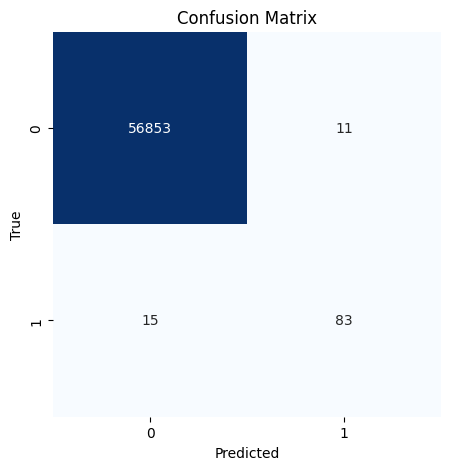

In [ ]:
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Print the results
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

Accuracy: 0.9995
Precision: 0.8830
Recall: 0.8469
F1 Score: 0.8646


In [ ]:
# XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# X_train and Y_train are your training features and labels
# X_test is your test data
# Replace them with the actual names of your data

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(XB_train, YB_train, test_size=0.2, random_state=42)

# XGBoost Classifier
xgb = XGBClassifier()

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    # Add other parameters to tune
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Train the best model on the full training data
best_xgb_model.fit(XB_train, YB_train)

# Make predictions on the test data
Y_pred = best_xgb_model.predict(X_test)

# Evaluate the performance on the test data (replace with your actual evaluation metric)
test_accuracy = accuracy_score(Y_test, Y_pred)
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))


Test Accuracy: 99.99%


In [ ]:
# Given values
TN = 56655
FP = 209
FN = 28
TP = 70

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = TP / (TP + FN)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1_score))
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Accuracy: {:.4f}".format(accuracy))

Precision: 0.2509
Recall: 0.7143
F1 Score: 0.3714
Accuracy: 0.9958


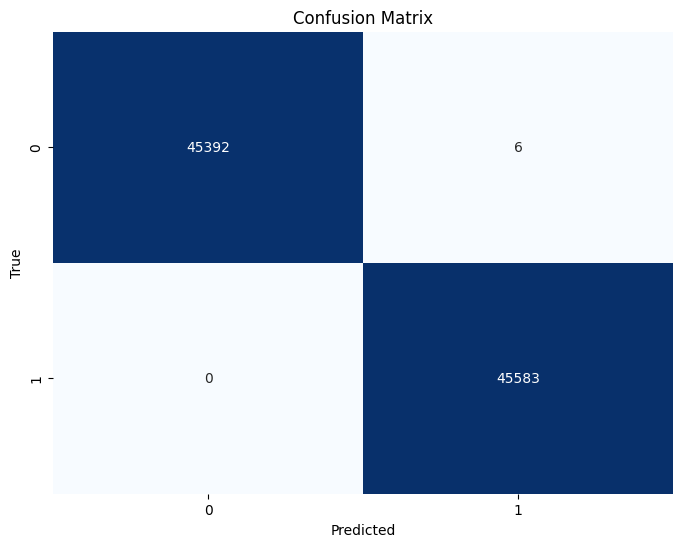

Accuracy: 0.9999
Precision: 0.9999
Recall: 1.0000
F1 Score: 0.9999


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# X_train and Y_train are your training features and labels
# X_test and Y_test are your test features and labels
# Replace them with the actual names of your data
X_train, X_test, Y_train, Y_test = train_test_split(XB_train, YB_train, test_size=0.2, random_state=42)

# XGBoost Classifier
xgb = XGBClassifier()

# Train the model
xgb.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = xgb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1 Score: {:.4f}".format(f1))

In [ ]:
XB_train.shape[1:]

(30,)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

XB_train_np = XB_train.to_numpy()

# Reshape the data
XB_train_reshaped = XB_train_np.reshape((XB_train_np.shape[0], 1, XB_train_np.shape[1]))

model = Sequential()
model.add(LSTM(20, input_shape=(1, XB_train_reshaped.shape[2]), kernel_initializer='lecun_uniform', activation='relu', dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, kernel_initializer='lecun_uniform', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

# Assuming XB_train_reshaped and YB_train are your training features and labels
model.fit(XB_train_reshaped, YB_train, epochs=5, batch_size=64, class_weight={0: 1., 1: float(int(1/np.mean(YB_train)))}, validation_split=0.3)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20)                4080      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 4101 (16.02 KB)
Trainable params: 4101 (16.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
4976/4976 [==============================] - 33s 6ms/step - loss: 36.1662 - accuracy: 0.8283 - val_loss: 0.7020 - val_accuracy: 0.8188
Epoch 2/5
4976/4976 [==============================] - 25s 5ms/step - loss: 1.4443 - accuracy: 0.8914 - val_loss: 1.5217 - val_accuracy: 0.7830
Epoch 3/5
4976/4976 [==============================] - 25s 5ms/step - loss: 0.7419 - accuracy: 0.9009 - val_loss: 0.2813 

In [ ]:
model

1781/1781 [==============================] - 8s 4ms/step
Test Accuracy (LSTM): 99.58%


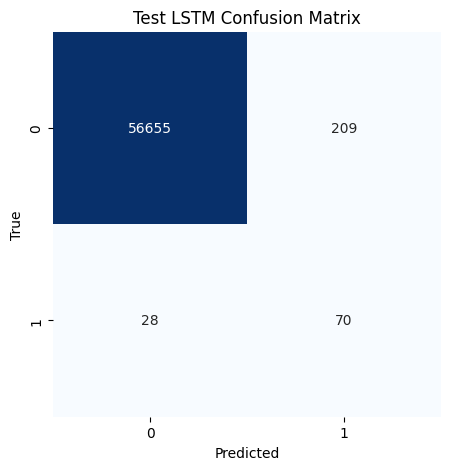

In [ ]:
X_test_lstm = X_test.to_numpy().reshape((X_test.shape[0], 1, X_test.shape[1]))

y_probabilities_lstm_test = model.predict(X_test_lstm)

# Convert probabilities to class predictions
y_pred_lstm_test = (y_probabilities_lstm_test > 0.7).astype(int)

# Assuming Y_test is your true labels for the test set
# Evaluate the model on the test set
accuracy_test_lstm = accuracy_score(Y_test, y_pred_lstm_test)
print("Test Accuracy (LSTM): {:.2f}%".format(accuracy_test_lstm * 100))

# Plot the confusion matrix for the test set
cm_lstm_test = confusion_matrix(Y_test, y_pred_lstm_test)
plt.figure(figsize=(5, 5))
sns.heatmap(cm_lstm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Test LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, recall_score

# Assuming cm_lstm_test is the confusion matrix
true_positive = cm_lstm_test[1, 1]
false_negative = cm_lstm_test[1, 0]
false_positive = cm_lstm_test[0, 1]


# Calculate sensitivity (recall)
sensitivity = true_positive / (true_positive + false_negative)
precision = true_positive / (true_positive + false_positive)

print("Sensitivity (Recall): {:.2f}".format(sensitivity))
print("Precision: {:.2f}".format(precision))

# Assuming y_probabilities_lstm_test is the predicted probabilities for the positive class
# Calculate AUC
auc_score = roc_auc_score(Y_test, y_probabilities_lstm_test)
print("AUC: {:.2f}".format(auc_score))


Sensitivity (Recall): 0.71
Precision: 0.25
AUC: 0.94
